In [1]:
import fastai
from fastai.vision.all import *
import pickle
import cv2

In [2]:
all_preds = pickle.load(open("/home/bbox_dictionary/cleaned_preds.pkl", "rb"))

In [3]:
all_preds['001001f099519f.jpg']

[618.0, 1002.0, 2043.0, 1433.0]

In [4]:
count = 0
for i in all_preds.keys() :
    if all_preds[i] == 0 :
        count = count + 1
        
print (count)

234


In [5]:
img = cv2.imread(f"/home/sample/001001f099519f.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

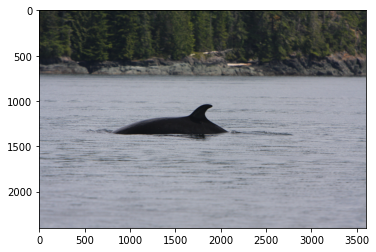

In [6]:
plt.imshow((img))

In [7]:
bbox = all_preds['001001f099519f.jpg']
print (bbox)
cropped_img = img[int(bbox[1]):int(bbox[3]), int(bbox[0]):int(bbox[2])]

[618.0, 1002.0, 2043.0, 1433.0]


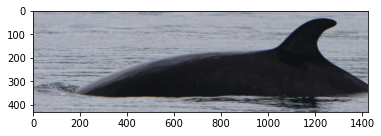

In [8]:
plt.imshow(cropped_img)

In [9]:
def visualise_bbox(img, bbox):
    cropped_img = img[int(bbox[1]): int(bbox[3]), int(bbox[0]) : int(bbox[2])]
    
    return cropped_img

In [10]:
image_list = [k for (k,v) in all_preds.items() if v != 0]
image_list = image_list[-5:]
image_list

['3264403ff8209e.jpg',
 '326513fe016c2e.jpg',
 '3266f0df4e3cb3.jpg',
 '326a8d115613c6.jpg',
 '328bffa5629d5a.jpg']

In [11]:
def scaled_visualise_bbox(img, bbox):
    x0 = 1.5 * bbox[0]
    y0 = 1.5 * bbox[1]
    x1 = 1.5 * bbox[2]
    y1 = 1.5 * bbox[3]
    cropped_img = img[int(y0) : int(y1), int(x0) : int(x1)]
    
    return cropped_img

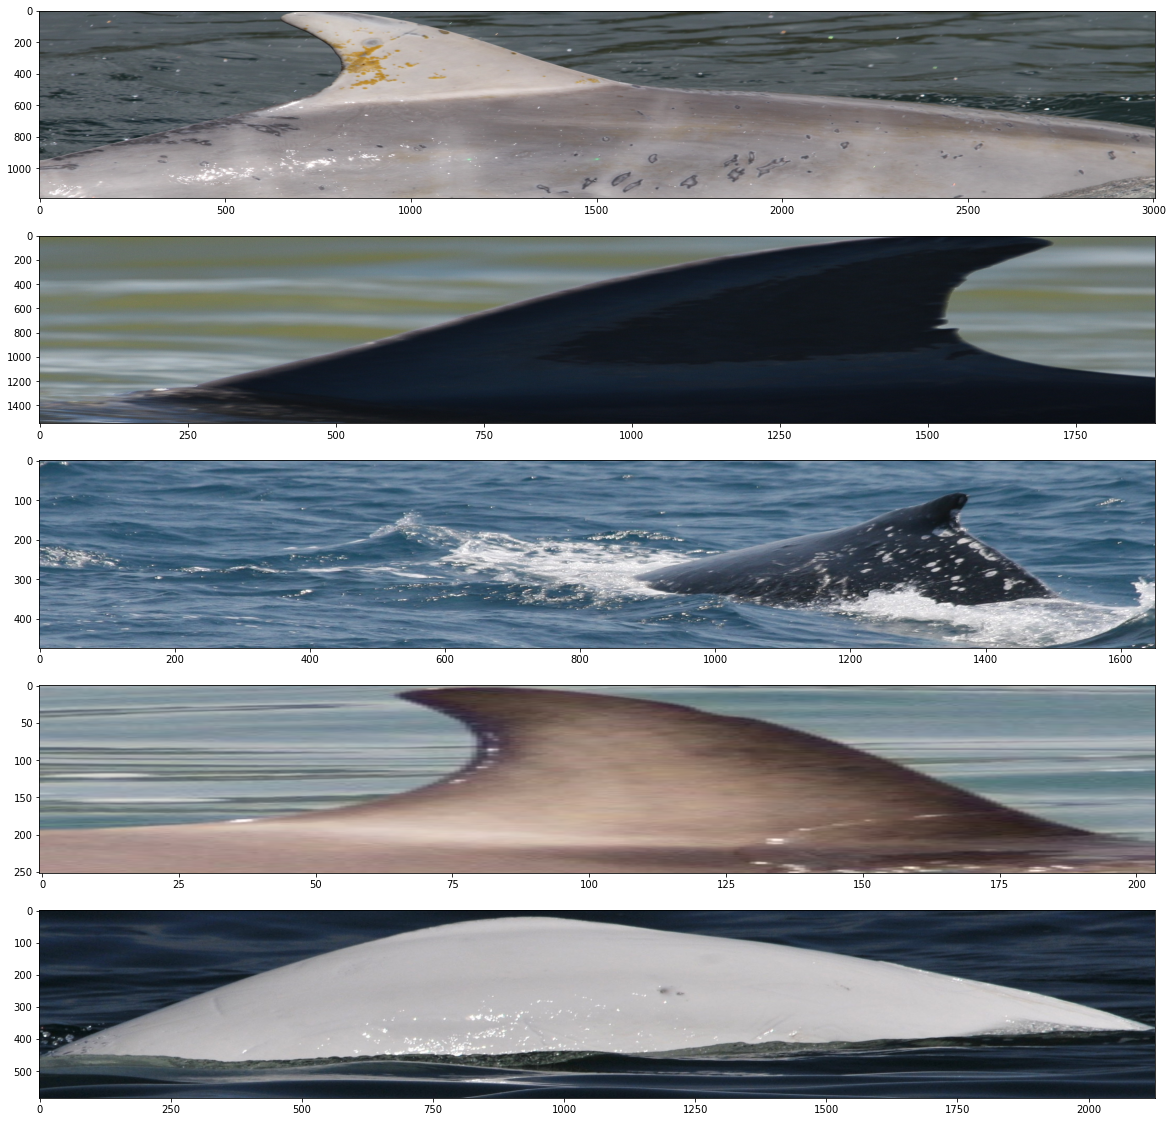

In [12]:
n_images = 5
figure, axes = plt.subplots(n_images, 1, figsize = (20,20))
for ax, imgname in zip(axes, image_list) :
    img = cv2.imread(f"/home/sample/{imgname}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    bbox = all_preds[imgname]
    cropped = visualise_bbox(img, bbox)
    ax.imshow(cropped, aspect = 'auto')

plt.show()

In [13]:
len(os.listdir("/home/sample"))

5104

In [14]:
len(all_preds)

1000

In [15]:
len(image_list)

5

In [18]:
%%time
def save_cropped_images():
    images_with_bbox = [k for (k,v) in all_preds.items() if v != 0]
    for imgname in images_with_bbox :
        img = cv2.imread(f"/home/sample/{imgname}")
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        bbox = all_preds[imgname]
        cropped = visualise_bbox(img, bbox)
        cv2.imwrite(f"/home/sample_cropped_images/{imgname}", cropped)
    
    images_without_bbox = [k for (k,v) in all_preds.items() if v == 0]
    for imgname in images_without_bbox :
        img = cv2.imread(f"/home/sample/{imgname}")
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        cv2.imwrite(f"/home/sample_cropped_images/{imgname}", img)
        
        
save_cropped_images()

CPU times: user 1min 45s, sys: 9.94 s, total: 1min 55s
Wall time: 1min 40s
